# Sentinel 2

**Compatability:** Notebook currently compatible with the `NCI` and `DEA Sandbox` environments

**Products used:** 
[`s2a_ard_granule`](https://explorer.sandbox.dea.ga.gov.au/s2a_ard_granule), 
[`s2b_ard_granule`](https://explorer.sandbox.dea.ga.gov.au/s2b_ard_granule)


## Background

Sentinel-2 is an Earth observation mission from the EU Copernicus Programme that systematically acquires optical imagery at high spatial resolution (up to 10m for some bands). The mission is based on a constellation of two identical satellites in the same orbit, 180° apart for optimal coverage and data delivery. Together they cover all Earth's land surfaces, large islands, inland and coastal waters every 3-5 days.

Sentinel-2A was launched on 23 June 2015 and Sentinel-2B followed on 7 March 2017.  Both of the Sentinel 2 satellites carries an innovative wide swath high-resolution multispectral imager with 13 spectral bands.  For more information on the Sentinel 2 platforms and applications, check out the [European Space Agency website](http://www.esa.int/Applications/Observing_the_Earth/Copernicus/Overview4).

Digital Earth Australia applies corrections to the Sentinel satellite images to arrive at a [Surface Reflectance (SR)](https://cmi.ga.gov.au/ga_s2_m_nbart_1) product. SR provides standardised optical datasets using robust physical models to correct for variations in image radiance values due to atmospheric properties, as well as sun and sensor geometry. The resulting stack of surface reflectance grids are consistent over space and time which is instrumental in identifying and quantifying environmental change.

The result of the SR corrections are two products:

1. **NBAR** (e.g. nbar_green)

    NBAR stands for Nadir-corrected BRDF Adjusted Reflectance, where BRDF stands for Bidirectional reflectance distribution function. The approach involves atmospheric correction to compute surface-leaving radiance, and bi-directional reflectance modelling to remove the effects of topography and angular variation in reflectance.

2. **NBART** (e.g. nbart_green)

    Surface reflectance NBART includes the terrain illumination reflectance correction and has the same features of NBAR, along with some additional features.


Sentinel 2 SR products have 13 spectral channels:

| Sentinel 2 bands | DEA band name | Band number | Central wavelength (nm) | Resolution (m) | Bandwidth (nm) |
| -----------------|---------------|-------------|-------------------------|----------------|----------------|
| Coastal aerosol | `nbar(t)_coastal_aerosol` | 1 | 443 | 60 | 20 |
| Blue | `nbar(t)_blue` | 2 | 490 | 10 | 65 |
| Green | `nbar(t)_green` | 3 | 560 | 10 | 35 |
| Red | `nbar(t)_red` | 4 | 665 | 10 | 30 |
| Vegetation red edge | `nbar(t)_red_edge_1` | 5 | 705 | 20 | 15 |
| Vegetation red edge | `nbar(t)_red_edge_2` | 6 | 740 | 20 | 15 |
| Vegetation red edge | `nbar(t)_red_edge_3` | 7 | 783 | 20 | 20 |
| NIR | `nbar(t)_nir_1` | 8 | 842 | 10 | 115 |
| Narrow NIR | `nbar(t)_nir_2` | 8A | 865 | 20 | 20 |
| Water vapour | N/A | 9 | 945 | 60 | 20 |
| SWIR - Cirrus | N/A | 10 | 1375 | 60 | 20 |
| SWIR | `nbar(t)_swir_2` | 11 | 1610 | 20 | 90 |
| SWIR | `nbar(t)_swir_3` | 12 | 2190 | 20 | 180 |

These bands cover the visible, near-infrared and short-wave infrared wave lengths.

<img align="center" src= "http://www.geosage.com/highview/figures/Sentinel2_Spectral_Bands.jpg">
     


**Note** There are a number of additional datasets that are alse returned from our query. These are a combination of datasets used in the correction process, and layers relating to pixel quality.

## Description

This notebook will run through loading in Sentinel 2A and Sentinel 2B satellite images.  Initially we use the native `dc.load` function to load in satellite images from only on of the Sentinel 2 satellites. Then we use the `load_ard` wrapper function to load in a concatenated, sorted, and cloud masked time series of both Sentinel satellites.

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

## Load packages

In [1]:
import datacube
from odc.ui import with_ui_cbk
import sys
sys.path.append('../Scripts')
from dea_datahandling import load_ard
from dea_plotting import rgb

### Connect to the datacube

In [2]:
dc = datacube.Datacube(app='Sentinel_2')

## Load Sentinel 2 data from the datacube

We will load satellite images from Sentinel-2A and Sentinel-2B using two methods. Firstly, we will use [dc.load](../Beginners_guide/04_Loading_data.ipynb) to return a a time series of satellite images from a single sensor. Secondly, we will load a time series using the [load_ard](../Frequently_used_code/Using_load_ard.ipynb) function, which is a wrapper function around the dc.load module. This function will load all the images from both Sentinel 2A and Sentinel 2B, combine them, and then apply a cloud mask. The returned xarray.Dataset will contain analysis ready images that with the cloudy and invalid pixels masked out.

You can change any of the parameters in the `query` object below to adjust the location, time, projection, or spatial resolution of the returned datasets.

In [3]:
# Create a query object
query = {
    "x": (153.45, 153.50),
    "y": (-28.90, -28.95),
    "time": ("2018-01", "2018-02"),
    "output_crs": "EPSG:3577",
    "resolution": (-10, 10),
    "group_by": "solar_day",
}

### Load Sentinel 2 using dc.load

Here will will load in a time-series of satellite images from only Sentinel 2A. To load in images from Sentinel 2B, change the `product` variable to `'s2b_ard_granule'`.

In [4]:
ds = dc.load(product="s2a_ard_granule",
             progress_cbk=with_ui_cbk(),
             **query)

print(ds)

<xarray.Dataset>
Dimensions:                (time: 6, x: 569, y: 635)
Coordinates:
  * time                   (time) datetime64[ns] 2018-01-06T23:52:41.026000 ... 2018-02-25T23:52:41.026000
  * y                      (y) float64 -3.313e+06 -3.313e+06 ... -3.319e+06
  * x                      (x) float64 2.057e+06 2.057e+06 ... 2.062e+06
Data variables:
    azimuthal_exiting      (time, y, x) float32 -52.001064 ... -149.62256
    azimuthal_incident     (time, y, x) float32 -113.70079 ... -103.34409
    exiting                (time, y, x) float32 8.219004 7.500775 ... 3.189789
    incident               (time, y, x) float32 26.11935 26.469913 ... 34.88186
    relative_azimuth       (time, y, x) float32 16.491493 16.49163 ... 37.717926
    relative_slope         (time, y, x) float32 -61.699726 ... 46.278465
    satellite_azimuth      (time, y, x) float32 99.85317 99.85317 ... 99.85641
    satellite_view         (time, y, x) float32 4.5776844 ... 3.9462671
    solar_azimuth          (time,

The returned dataset contains all of the bands available for Sentinel 2.  These include both `NBAR` and `NBART` versions of the optical bands, along with [fmask](../Frequently_used_code/Masking_data.ipynb), which can be used for cloud masking, and channels that are used for creating the surface reflectance product. Usually we are not interested in returning all the possible bands, but instead are only interested in a subset of these.  If we wished to return only a few of `NBART` optical bands, then we would pass a `measurements` parameter to dc.load (or, alternatively, amend the initial `query` object to have a `measurements` parameter). 

In [5]:
bands = ["nbart_blue", "nbart_green", "nbart_red"]

In [6]:
ds = dc.load(product="s2a_ard_granule",
             measurements=bands,
             progress_cbk=with_ui_cbk(),
             **query)

print(ds)

<xarray.Dataset>
Dimensions:      (time: 6, x: 569, y: 635)
Coordinates:
  * time         (time) datetime64[ns] 2018-01-06T23:52:41.026000 ... 2018-02-25T23:52:41.026000
  * y            (y) float64 -3.313e+06 -3.313e+06 ... -3.319e+06 -3.319e+06
  * x            (x) float64 2.057e+06 2.057e+06 ... 2.062e+06 2.062e+06
Data variables:
    nbart_blue   (time, y, x) int16 329 334 348 362 357 ... 1120 1343 1540 1625
    nbart_green  (time, y, x) int16 660 688 719 706 719 ... 1377 1511 1625 1705
    nbart_red    (time, y, x) int16 357 357 379 387 392 ... 1568 1609 1596 1675
Attributes:
    crs:      EPSG:3577


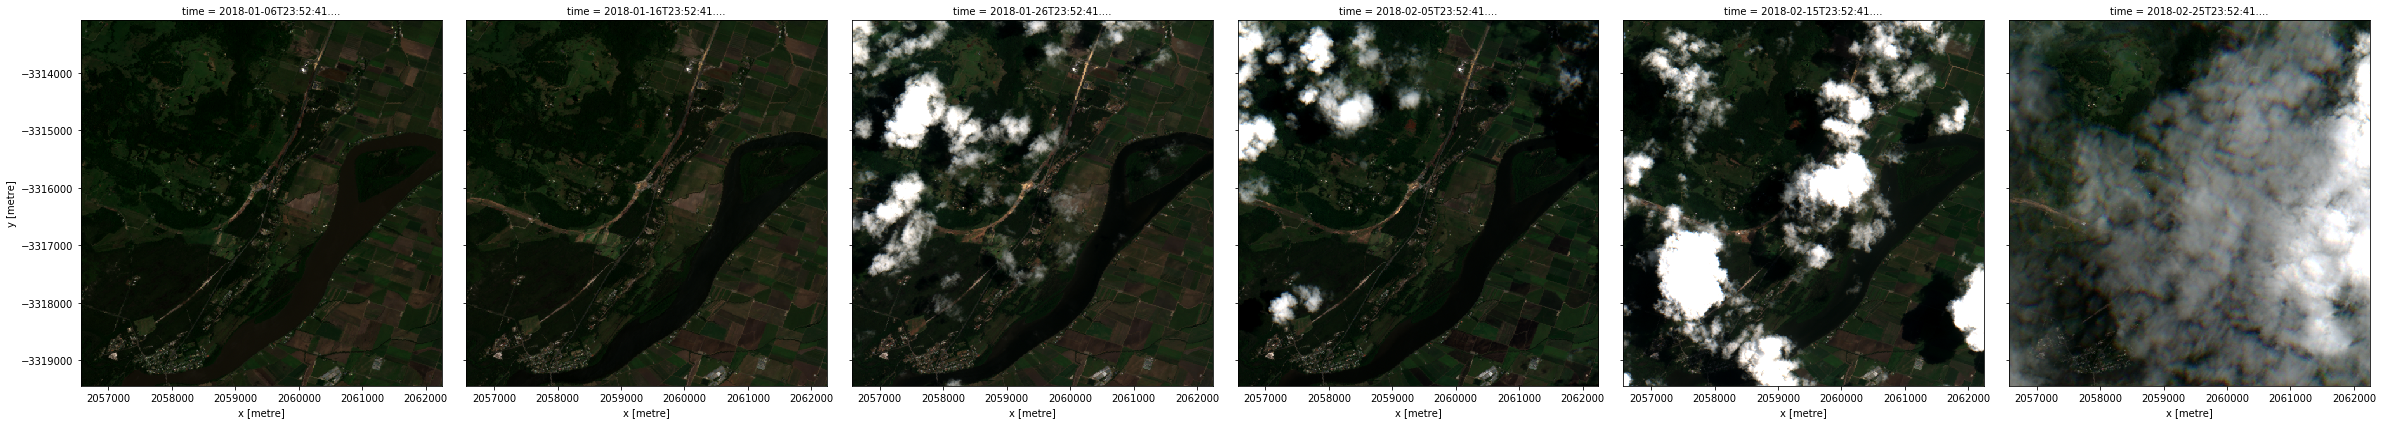

In [7]:
rgb(ds, col='time', col_wrap=6)

### Load Sentinel 2 using load_ard

This function will load images from both Sentinel 2A and Sentinel 2B, concatenate and sort the observations by time, and cloud mask. The result is an analysis ready dataset. More information on using [load_ard](../Frequently_used_code/Using_load_ard.ipynb) can be found by following the hyperlink.

In [8]:
ds = load_ard(dc=dc,
              products=['s2a_ard_granule', 's2b_ard_granule'],
              measurements=bands,
              **query)

print(ds)

Loading s2a_ard_granule data
    Applying pixel quality mask
Loading s2b_ard_granule data
    Applying pixel quality mask
Combining and sorting data
    Masking out invalid values
    Returning 12 observations 
<xarray.Dataset>
Dimensions:      (time: 12, x: 569, y: 635)
Coordinates:
  * y            (y) float64 -3.313e+06 -3.313e+06 ... -3.319e+06 -3.319e+06
  * x            (x) float64 2.057e+06 2.057e+06 ... 2.062e+06 2.062e+06
  * time         (time) datetime64[ns] 2018-01-01T23:52:39.027000 ... 2018-02-25T23:52:41.026000
Data variables:
    nbart_blue   (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    nbart_green  (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    nbart_red    (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    crs:      EPSG:3577


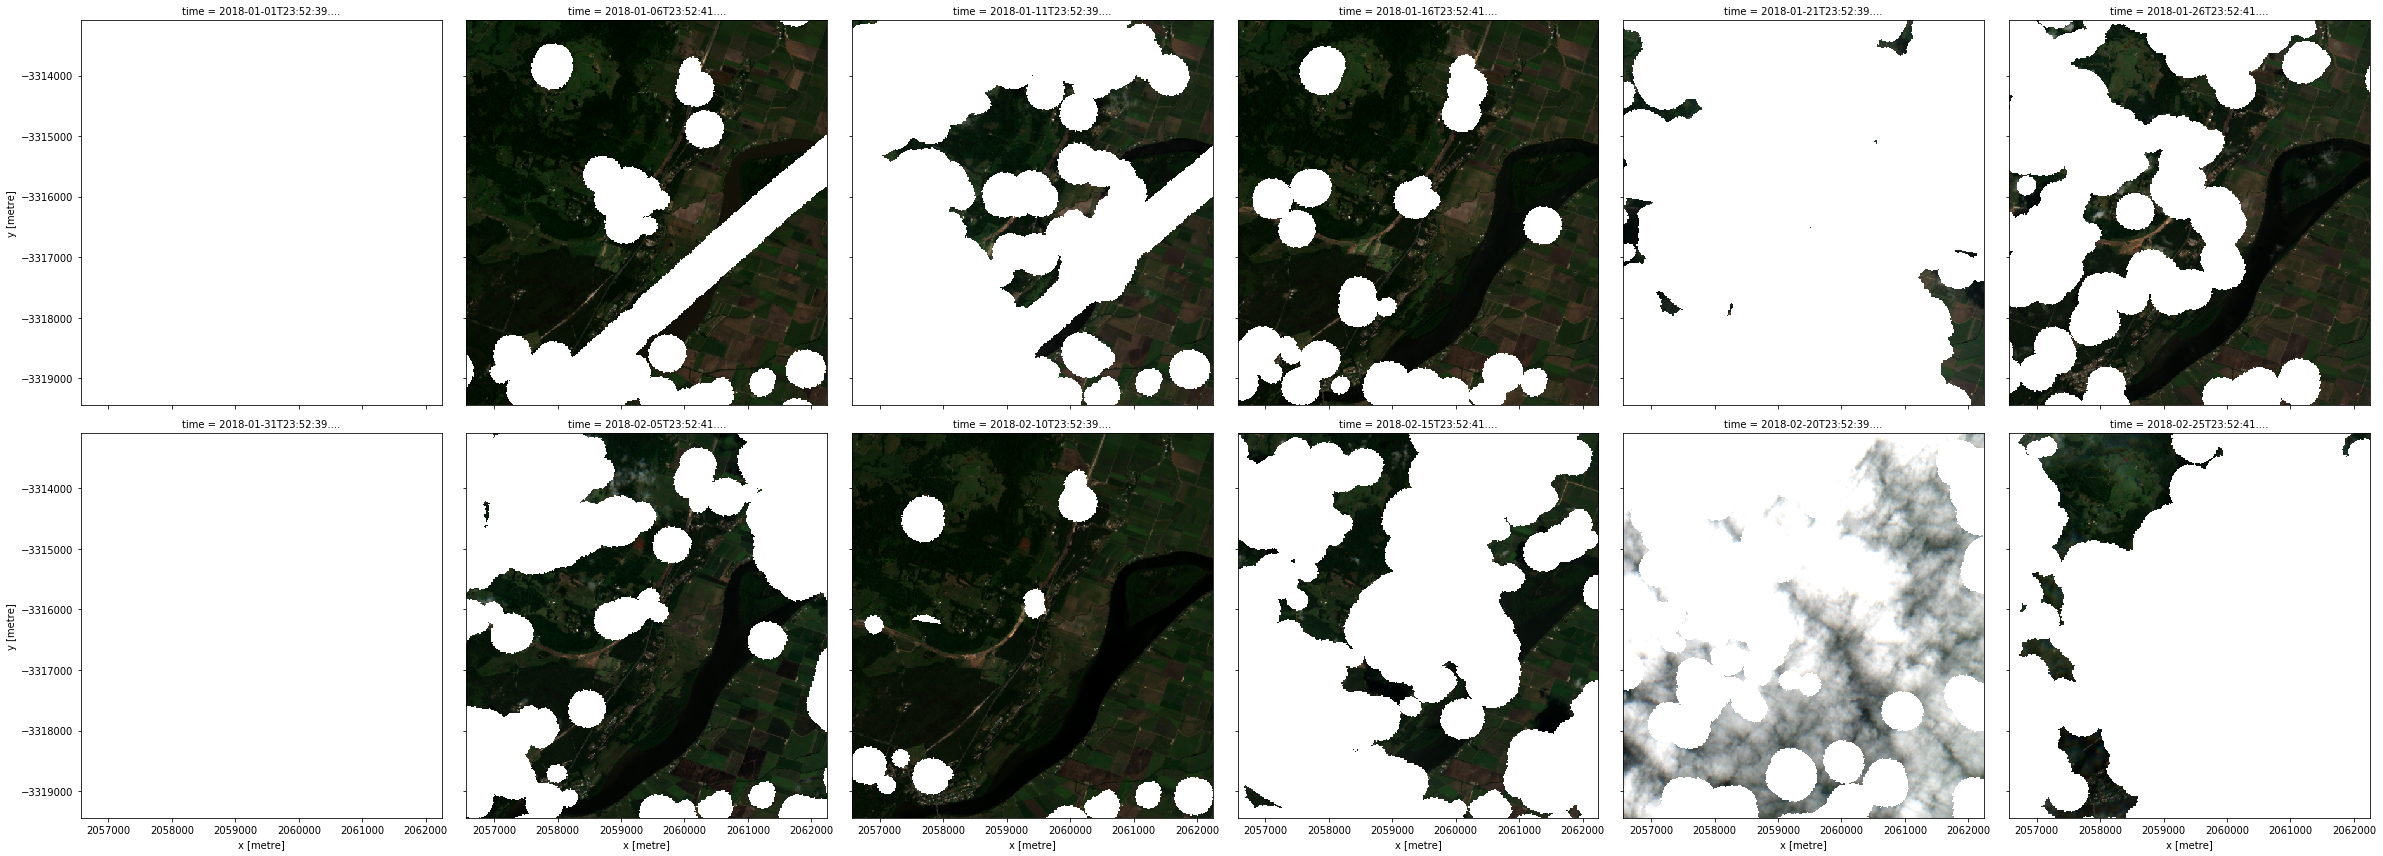

In [9]:
rgb(ds, col='time', col_wrap=6)

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** October 2019

**Compatible datacube version:** 

In [11]:
print(datacube.__version__)

1.7+128.gebdc898a.dirty


## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)